In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DeepLearningCourse/71_36.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-10.440728,9.220097,-20.707729,6.607158,-19.529615,21.251484,-12.956049,20.434342,12.687891,-1.439507
1,12.155823,8.858985,-17.071138,-23.823867,19.192672,3.017127,-17.780054,4.750363,-12.049571,27.656253
2,-8.579324,10.500568,-17.501436,5.760518,-20.956348,20.403692,-14.099575,23.691759,13.266730,-4.389464
3,-15.446555,-4.035479,15.207785,-13.285472,24.687674,10.801007,9.490218,23.362035,18.498444,-11.775716
4,-18.740831,-6.687865,14.312007,-15.941405,20.368070,16.717548,11.622035,23.113337,16.466612,-13.347755


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-5.581611,1.643065,-0.939594,-7.883424,13.391209,7.959774,-10.187819,4.579812,1.063883,1.801798
std,12.900662,10.453511,15.976140,12.113340,14.672377,11.716187,11.540637,14.929848,14.480722,11.919514
min,-22.648047,-15.724366,-22.533885,-25.936949,-20.956348,-13.423286,-24.081730,-17.903724,-20.423880,-16.667129
25%,-15.189461,-6.453115,-17.227716,-15.481828,16.812196,0.892577,-20.786315,-8.725516,-11.673206,-4.365907
50%,-10.041902,2.259145,-2.142141,-11.267086,18.961272,6.999911,-12.937971,2.550236,3.513982,-1.651201
75%,10.014061,11.779518,16.111048,5.790077,21.333163,19.689425,-4.251454,21.694990,14.723837,6.706930
max,14.561047,16.472977,23.973125,13.499596,24.687674,23.188941,13.104619,25.547230,19.084067,27.656253


In [ ]:
pca = PCA(n_components = 10, svd_solver = 'full')
pca.fit(data)
pca_data = pca.transform(data)

In [ ]:
pca_data[0].round(3)[:2]

array([40.975, -4.522])

In [ ]:
explained_variance_ratio = np.sum(pca.explained_variance_ratio_[:2])

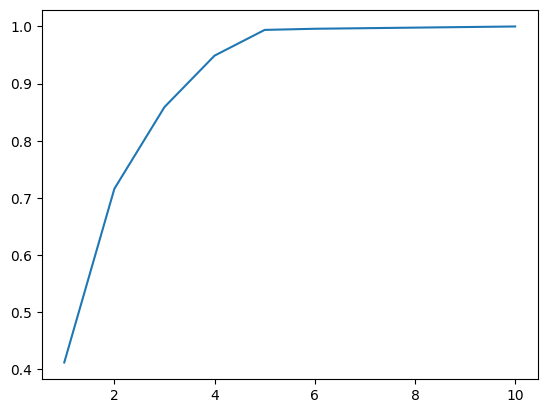

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_).round(3)
plt.plot(np.arange(1,11), explained_variance, ls = '-')

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
min_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

In [ ]:
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(pca_data)

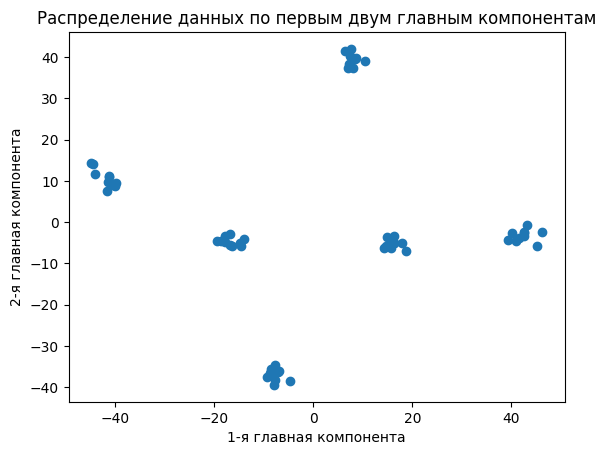

In [ ]:
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel('1-я главная компонента')
plt.ylabel('2-я главная компонента')
plt.title('Распределение данных по первым двум главным компонентам')
plt.show()

In [ ]:
# Ответы
print(f"Координата первого объекта относительно первой главной компоненты: {float(pca_data[0].round(3)[:1])}")
print(f"Координата первого объекта относительно второй главной компоненты: {float(pca_data[0].round(3)[:2][1:])}")
print(f"Доля объясненной дисперсии для первых двух компонент: {round(explained_variance_ratio, 3)}")
print(f"Минимальное количество компонент для объяснения дисперсии более 85%: {min_components}")

Координата первого объекта относительно первой главной компоненты: 40.975
Координата первого объекта относительно второй главной компоненты: -4.522
Доля объясненной дисперсии для первых двух компонент: 0.716
Минимальное количество компонент для объяснения дисперсии более 85%: 3


<ipython-input-19-97e0a1cb950c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Координата первого объекта относительно первой главной компоненты: {float(pca_data[0].round(3)[:1])}")
<ipython-input-19-97e0a1cb950c>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Координата первого объекта относительно второй главной компоненты: {float(pca_data[0].round(3)[:2][1:])}")


# Задание 2

In [ ]:
import pandas as pd

In [ ]:
w_matrix = pd.read_csv('/content/drive/MyDrive/DeepLearningCourse/X_loadings_408.csv', header=None, sep=';')
s_matrix = pd.read_csv('/content/drive/MyDrive/DeepLearningCourse/X_reduced_408.csv', header=None, sep=';')

In [ ]:
im = s_matrix.dot(w_matrix.T)

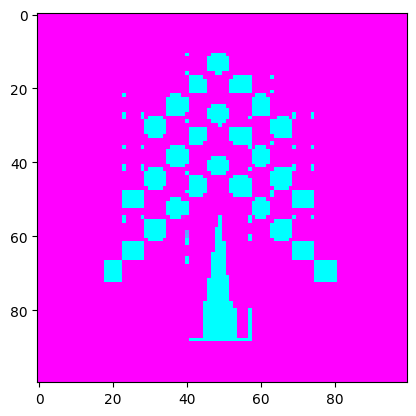

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(im, interpolation='nearest', cmap=plt.cm.cool, vmin=-1, vmax=0)
plt.show()